In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    accuracy_score, 
    roc_auc_score, 
    roc_curve, 
    auc
)

In [75]:
df = pd.read_csv("Raisin_preprocessed.csv")

In [76]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,1
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,1
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,1
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,1
4,79408.0,352.190770,290.827533,0.590559,81463.0,0.792772,1073.251,1


In [77]:
x = df.drop('Class', axis=1)
y = df['Class']

In [78]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [79]:
x_scaled_df = pd.DataFrame(
    x_scaled,
    columns=x.columns
)
x_scaled_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,0.018233,0.114718,-0.008905,0.433793,0.014334,1.182348,0.085566
1,-0.321083,-0.205127,-0.223887,0.209859,-0.299351,-0.340924,-0.154109
2,0.109720,0.114908,0.264303,0.166758,0.098939,-1.291766,0.180025
3,-1.123875,-1.285961,-0.942103,-1.248841,-1.138540,-0.024708,-1.222948
4,-0.204609,-0.695392,0.777711,-2.428005,-0.228007,1.879817,-0.340966


In [80]:
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled_df, y, test_size=0.2, random_state=42)

In [81]:
xtrain.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
10,-0.176356,0.179564,-0.448263,0.887128,-0.148044,-0.543162,0.055787
334,-0.394750,-0.855274,0.606989,-2.428005,-0.401912,0.109801,-0.422169
244,-0.030778,-0.441896,0.723825,-1.655140,-0.078888,1.253911,-0.258866
678,2.380226,1.724596,2.458959,0.084868,2.365533,0.659273,1.991428
306,-0.659657,-0.074881,-1.310724,1.324289,-0.683100,1.744358,-0.551551


In [82]:
ytrain.head()

10     1
334    1
244    1
678    0
306    1
Name: Class, dtype: int64

In [83]:
logi = LogisticRegression(max_iter=500)

In [84]:
param_grid = {
    'C': [0.01, 0.1, 1, 5, 10, 50],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

In [85]:
grid = GridSearchCV(
    estimator=logi,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy'
)

In [86]:
logistic_model = grid.fit(xtrain, ytrain)

In [87]:
print(f'Train score: {logistic_model.score(xtrain, ytrain)}')
print(f'Test score: {logistic_model.score(xtest, ytest)}')

Train score: 0.8694444444444445
Test score: 0.8666666666666667


In [88]:
logistic_pred = logistic_model.predict(xtest)

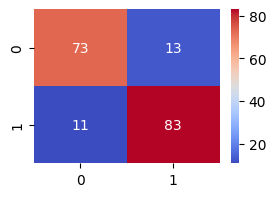

In [97]:
cm_log = confusion_matrix(ytest, logistic_pred)
plt.figure(figsize=(3,2))
sns.heatmap(cm_log, annot=True, cmap='coolwarm')
plt.show()

In [91]:
k_values = range(2,20)
for k in k_values:
    print(f'K Value is: {k}')
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_model = knn.fit(xtrain, ytrain)
    print(f'Train score: {knn_model.score(xtrain, ytrain)}')
    print(f'Test score: {knn_model.score(xtest, ytest)}')
    pred_knn = knn_model.predict(xtest)
    print(f'Confusion matrix:\n{confusion_matrix(ytest, pred_knn)}')
    print(f'Acuuracy Score: {accuracy_score(ytest, pred_knn)}')
    print("-------------------------")

K Value is: 2
Train score: 0.9180555555555555
Test score: 0.8
Confusion matrix:
[[79  7]
 [29 65]]
Acuuracy Score: 0.8
-------------------------
K Value is: 3
Train score: 0.9138888888888889
Test score: 0.8277777777777777
Confusion matrix:
[[72 14]
 [17 77]]
Acuuracy Score: 0.8277777777777777
-------------------------
K Value is: 4
Train score: 0.8944444444444445
Test score: 0.8
Confusion matrix:
[[75 11]
 [25 69]]
Acuuracy Score: 0.8
-------------------------
K Value is: 5
Train score: 0.8847222222222222
Test score: 0.8277777777777777
Confusion matrix:
[[71 15]
 [16 78]]
Acuuracy Score: 0.8277777777777777
-------------------------
K Value is: 6
Train score: 0.8763888888888889
Test score: 0.8277777777777777
Confusion matrix:
[[74 12]
 [19 75]]
Acuuracy Score: 0.8277777777777777
-------------------------
K Value is: 7
Train score: 0.8791666666666667
Test score: 0.8555555555555555
Confusion matrix:
[[72 14]
 [12 82]]
Acuuracy Score: 0.8555555555555555
-------------------------
K Value is